<center><h1>Long Short-Term Memory Recurrent Neural Network</h1></center>

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
numpy.random.seed(7)
plt.rcParams['figure.figsize'] = (10, 6)

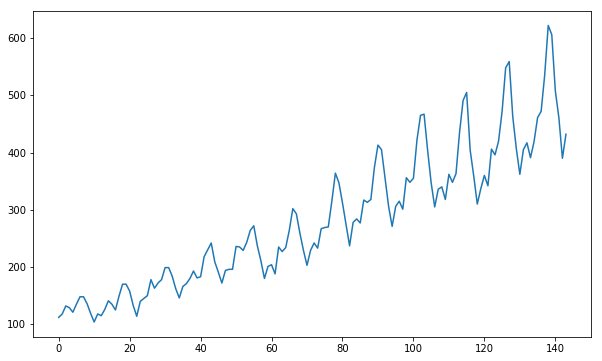

In [3]:
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

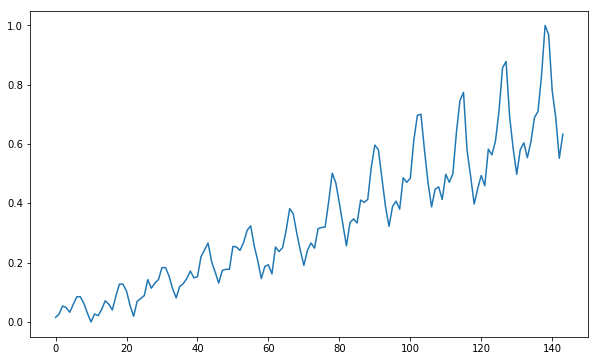

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_norm = scaler.fit_transform(dataset)
plt.plot(data_norm)
plt.show()

In [5]:
train_size = int(len(data_norm) * 0.65)
test_size = len(data_norm) - train_size
train, test = data_norm[0:train_size,:], data_norm[train_size:len(dataset),:]
print('Tamanho do conjunto de treino:', len(train))
print('Tamanho do conjunto de teste:', len(test))

Tamanho do conjunto de treino: 93
Tamanho do conjunto de teste: 51


In [6]:
def criar_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
exemplo_x, exemplo_y = criar_dataset(dataset, 1)
print(exemplo_x[:5,0])
print(exemplo_y[:5])

[ 112.  118.  132.  129.  121.]
[ 118.  132.  129.  121.  135.]


In [7]:
look_back = 1
trainX, trainY = criar_dataset(train, look_back)
testX, testY = criar_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [8]:
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back)))
model.add(Dense(1))
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1)
print('Tempo de processamento: %.2f segundos' % (time.time() - start))

Epoch 1/100
91/91 [==============================] - 1s - loss: 0.0406     
Epoch 2/100
91/91 [==============================] - 0s - loss: 0.0191     
Epoch 3/100
91/91 [==============================] - 0s - loss: 0.0150     
Epoch 4/100
91/91 [==============================] - 0s - loss: 0.0138     
Epoch 5/100
91/91 [==============================] - 0s - loss: 0.0128     
Epoch 6/100
91/91 [==============================] - 0s - loss: 0.0118      
Epoch 7/100
91/91 [==============================] - 0s - loss: 0.0108     
Epoch 8/100
91/91 [==============================] - 0s - loss: 0.0098     
Epoch 9/100
91/91 [==============================] - 0s - loss: 0.0090     
Epoch 10/100
91/91 [==============================] - 0s - loss: 0.0081     
Epoch 11/100
91/91 [==============================] - 0s - loss: 0.0072     
Epoch 12/100
91/91 [==============================] - 0s - loss: 0.0063     
Epoch 13/100
91/91 [==============================] - 0s - loss: 0.0056     
Epoch 1

In [9]:
trainPredict = model.predict(trainX)
trainY = [trainY]
testPredict = model.predict(testX)
testY = [testY]
trainREQM = math.sqrt(mean_squared_error(trainY[0][:-1], trainPredict[1:,0]))
print('REQM: %.4f para os dados de treino' % (trainREQM))
testREQM = math.sqrt(mean_squared_error(testY[0][:-1], testPredict[1:,0]))
print('REQM: %.4f para os dados de teste' % (testREQM))

REQM: 0.0041 para os dados de treino
REQM: 0.0027 para os dados de teste


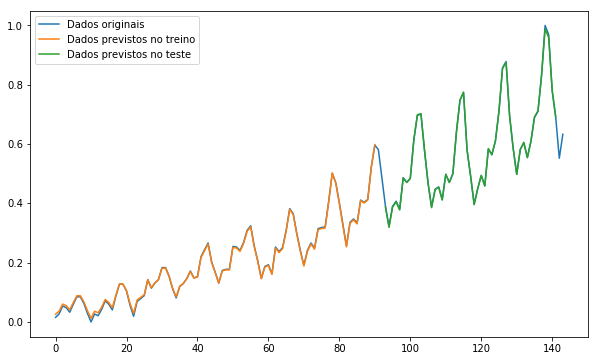

In [10]:
trainPredictPlot = numpy.empty_like(data_norm)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back-1:len(trainPredict)+look_back-1, :] = trainPredict
testPredictPlot = numpy.empty_like(data_norm)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data_norm)-2, :] = testPredict
plt.plot(data_norm, label='Dados originais')
plt.plot(trainPredictPlot, label='Dados previstos no treino')
plt.plot(testPredictPlot, label='Dados previstos no teste')
plt.legend()
plt.show()